### Function to fetch the data

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

### Load data using Pandas

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()
# housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Explore dataset (a bit)

In [67]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [69]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


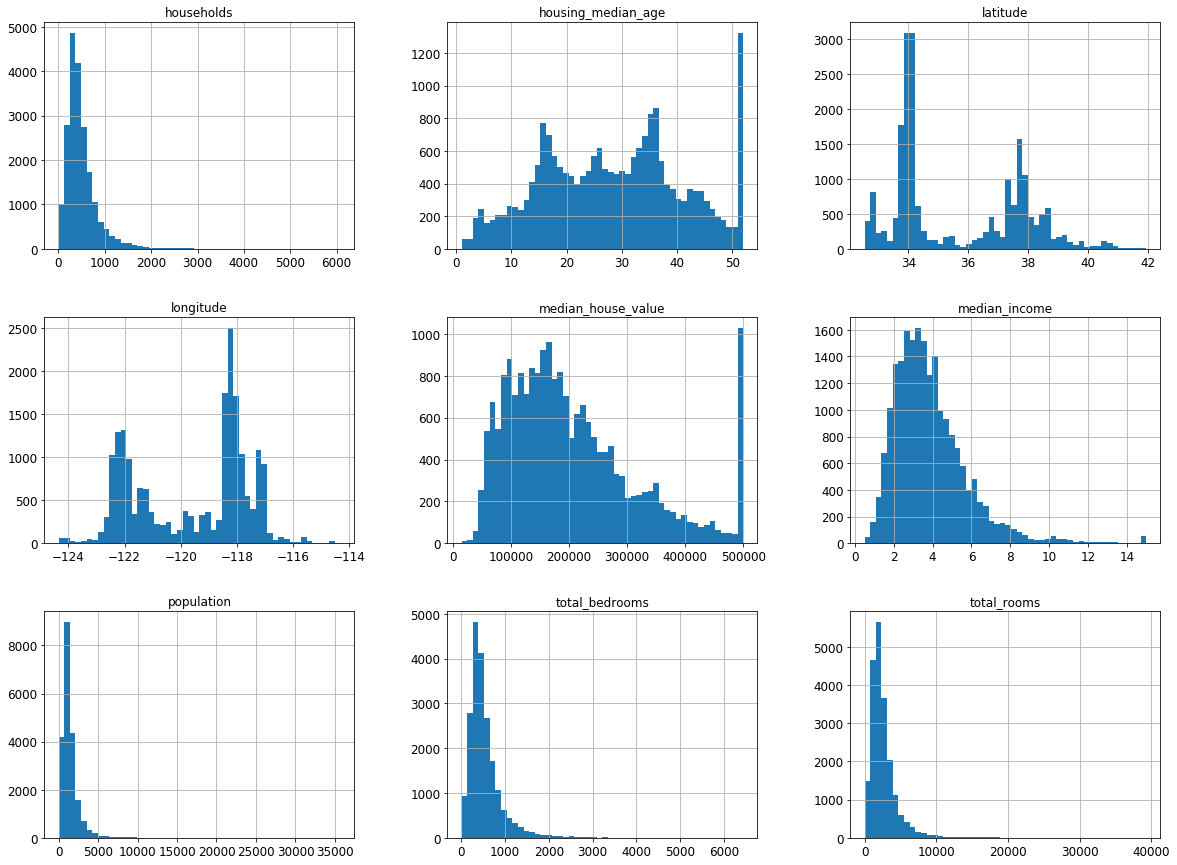

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

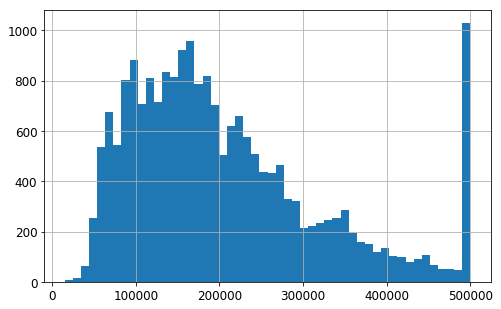

In [83]:
housing['median_house_value'].hist(bins=50, figsize=(8,5))
plt.show()

### Locate points (ArcGIS)

In [59]:
from arcgis.gis import GIS
my_gis = GIS()
# my_gis.map()

In [60]:
housingloc = housing[['longitude', 'latitude']]

In [61]:
housingloc.head()

,longitude,latitude
0,-122.23,37.88
1,-122.22,37.86
2,-122.24,37.85
3,-122.25,37.85
4,-122.25,37.85


In [62]:
housingloc[1000:2000].tail(5)

,longitude,latitude
1995,-119.77,36.72
1996,-119.78,36.73
1997,-119.77,36.73
1998,-119.77,36.75
1999,-119.77,36.74


In [63]:
housingmap = my_gis.content.import_data(housingloc[1000:2000])

In [64]:
map1 = my_gis.map('California')

In [65]:
map1.add_layer(housingmap)

In [66]:
map1

MapView(layout=Layout(height='400px', width='100%'))

### Locate points (Matplotlib)

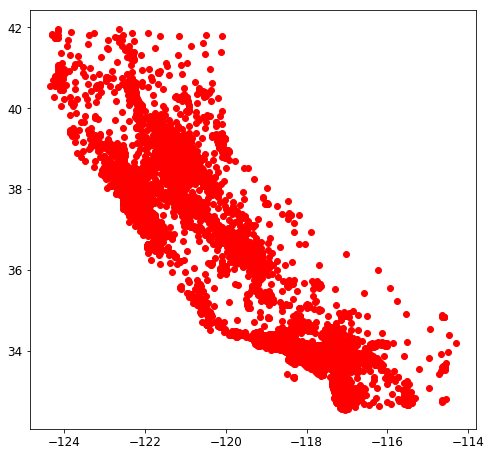

In [75]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

x = housing['longitude']
y = housing['latitude']

plt.figure(figsize=(8,8))
plt.plot(x, y, 'ro')
plt.axis('scaled')
plt.draw()

### Locate points (Folium)
https://python-visualization.github.io/folium/

In [4]:
lomin = housing['longitude'].min()
lomax = housing['longitude'].max()
lamin = housing['latitude'].min()
lamax = housing['latitude'].max()
print(lomin, lomax, lamin, lamax)

-124.35 -114.31 32.54 41.95


In [5]:
import folium

In [34]:
m = folium.Map(
#     location=[45.372, -121.6972],
#     bounds = [(32.54, -124.35), (41.95, -114.31)],
#     zoom_start=5,
#     tiles='OpenStreetMap'
    tiles='Stamen Toner',
#     tiles='Stamen Terrain'
#     tiles = 'Stamen Watercolor'
#     tiles = 'Mapbox Bright'
#     tiles = 'Mapbox Control Room'
#     tiles = 'CartoDB positron'
#     tiles = 'CartoDB dark_matter'
    width='50%', height='50%',
)

In [35]:
m.fit_bounds([(lamin, lomin), (lamax, lomax)])

In [22]:
listofpoints = [[row['latitude'], row['longitude']] for index, row in housing[:2000].iterrows()]

In [ ]:
listofpoints

In [36]:
for p in listofpoints:
    folium.Circle(location=p, radius=5, color='crimson', fill=True, fill_color='crimson').add_to(m)

In [14]:
for p in listofpoints:
    folium.Marker([p[0], p[1]]).add_to(m)

In [ ]:
m

### Locate points (Geopandas)

In [49]:
import geopandas

In [41]:
cali = geopandas.read_file('datasets/shapefiles/California/GU_StateOrTerritory.shp')

In [ ]:
cali.head()

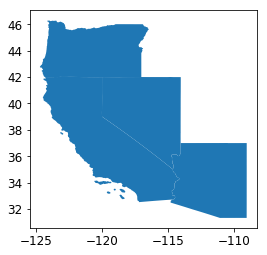

In [48]:
cali.plot()

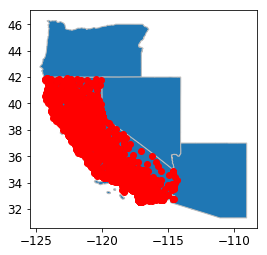

In [80]:
fig, ax = plt.subplots()
ax.set_aspect('equal')

plt.plot(x, y, 'ro')
cali.plot(ax=ax, color='#1f77b4', edgecolor='#bbbbbb')

plt.show()

### Create a Test Set

In [88]:
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [89]:
train_set, test_set = split_train_test(housing, 0.2)

In [90]:
len(train_set)

16512

In [91]:
len(test_set)

4128